Examen III IA Sara Domínguez 20161005072

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
import plotly.express as px

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, roc_curve

In [5]:
from sklearn.neural_network import MLPClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor

In [6]:
wine = pd.read_csv('winequalityN.csv')

In [7]:
wine

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Segun el dataset de wine, realice las siguientes actividades:
- Limpie las variables numericas. (evalue primero si vale la pena estretificar por type), en caso de existir valores atipicos remplece por la media.
- Aplique PCA utilizando maximo 5 columnas (evalue si el PCA vale la pena hacer uno para white y otro para red)
    - No se debe de usar quality para este ejercicio
- Una ves tenga el PCA, aplique un algoritmo de k-means para crear tres perfiles del vino. (explique que significa cada perfil)
- Agregue la nueva variable al dateset y elimine las columnas que hayan formado parte de analisis del PCA, tanto para white como para red, en caso que hayan sido entrenamientos distintos.
- Crea la varible de respuesta de la siguiente manera:
    - if quality >= 5 ? 1 else 0
- Elimine la variable quality del dataset
- Aplique los siguientes entrenamientos de MLS (evalue primero si vale la pena estretificar por type):
    - Regresion Logistica
    - NN
    - Aroboles de desiciones
    - Random Forest
- Explique cual de los entrenamientos fue el mejor?

In [8]:
wine.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [9]:
wine.shape

(6497, 13)

In [10]:
wine.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6487.0,7.216579,1.296750,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6489.0,0.339691,0.164649,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6494.0,0.318722,0.145265,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6495.0,5.444326,4.758125,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6495.0,0.056042,0.035036,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6488.0,3.218395,0.160748,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6493.0,0.531215,0.148814,0.22000,0.43000,0.51000,0.60000,2.00000


- Limpie las variables numericas. (evalue primero si vale la pena estretificar por type), en caso de existir valores atipicos remplece por la media.

In [11]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [12]:
wine["fixed acidity"].mean()

7.2165793124710795

In [13]:
wine.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [14]:
wine.loc[ pd.isnull( wine['fixed acidity'] ) , 'fixed acidity' ] = np.mean(wine["fixed acidity"])
wine.loc[ pd.isnull( wine['volatile acidity'] ) , 'volatile acidity' ] = np.mean(wine["volatile acidity"])
wine.loc[ pd.isnull( wine['citric acid'] ) , 'citric acid' ] = np.mean(wine["citric acid"])
wine.loc[ pd.isnull( wine['residual sugar'] ) , 'residual sugar' ] = np.mean(wine["residual sugar"])
wine.loc[ pd.isnull( wine['pH'] ) , 'pH' ] = np.mean(wine["pH"])
wine.loc[ pd.isnull( wine['sulphates'] ) , 'sulphates' ] = np.mean(wine["sulphates"])
wine.loc[ pd.isnull( wine['chlorides'] ) , 'chlorides' ] = np.mean(wine["chlorides"])

In [15]:
wine.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [16]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [17]:
wine.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6497.0,7.216579,1.295751,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6497.0,0.339691,0.164548,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6497.0,0.318722,0.145231,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6497.0,5.444326,4.757392,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6497.0,0.056042,0.035031,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6497.0,3.218395,0.160637,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6497.0,0.531215,0.148768,0.22000,0.43000,0.51000,0.60000,2.00000


{'whiskers': [<matplotlib.lines.Line2D at 0x222ab01b880>,
 'caps': [<matplotlib.lines.Line2D at 0x222ab01bee0>,
 'boxes': [<matplotlib.lines.Line2D at 0x222ab01b550>],
 'medians': [<matplotlib.lines.Line2D at 0x222ab037640>],
 'fliers': [<matplotlib.lines.Line2D at 0x222ab0379d0>],
 'means': []}

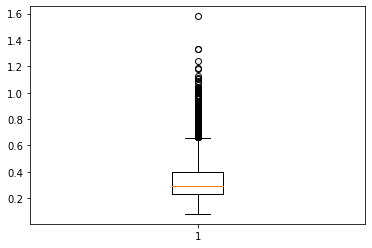

In [18]:
plt.boxplot( wine["volatile acidity"] )

In [19]:
wine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.219918,0.323349,-0.112219,0.298282,-0.283237,-0.329409,0.458941,-0.251683,0.300225,-0.095560,-0.076967
volatile acidity,0.219918,1.000000,-0.377759,-0.196578,0.377122,-0.353055,-0.414706,0.271107,0.260283,0.225313,-0.038215,-0.265838
citric acid,0.323349,-0.377759,1.000000,0.142451,0.039310,0.133426,0.195148,0.096307,-0.328354,0.057564,-0.010431,0.085699
residual sugar,-0.112219,-0.196578,0.142451,1.000000,-0.128887,0.403242,0.495704,0.552487,-0.266717,-0.185716,-0.359656,-0.036819
chlorides,0.298282,0.377122,0.039310,-0.128887,1.000000,-0.194978,-0.279547,0.362580,0.044754,0.395073,-0.256844,-0.200818
free sulfur dioxide,-0.283237,-0.353055,0.133426,0.403242,-0.194978,1.000000,0.720934,0.025717,-0.145116,-0.188471,-0.179838,0.055463
total sulfur dioxide,-0.329409,-0.414706,0.195148,0.495704,-0.279547,0.720934,1.000000,0.032395,-0.237523,-0.275291,-0.265740,-0.041385
density,0.458941,0.271107,0.096307,0.552487,0.362580,0.025717,0.032395,1.000000,0.011913,0.259432,-0.686745,-0.305858
pH,-0.251683,0.260283,-0.328354,-0.266717,0.044754,-0.145116,-0.237523,0.011913,1.000000,0.191075,0.120939,0.019356
sulphates,0.300225,0.225313,0.057564,-0.185716,0.395073,-0.188471,-0.275291,0.259432,0.191075,1.000000,-0.003261,0.038713


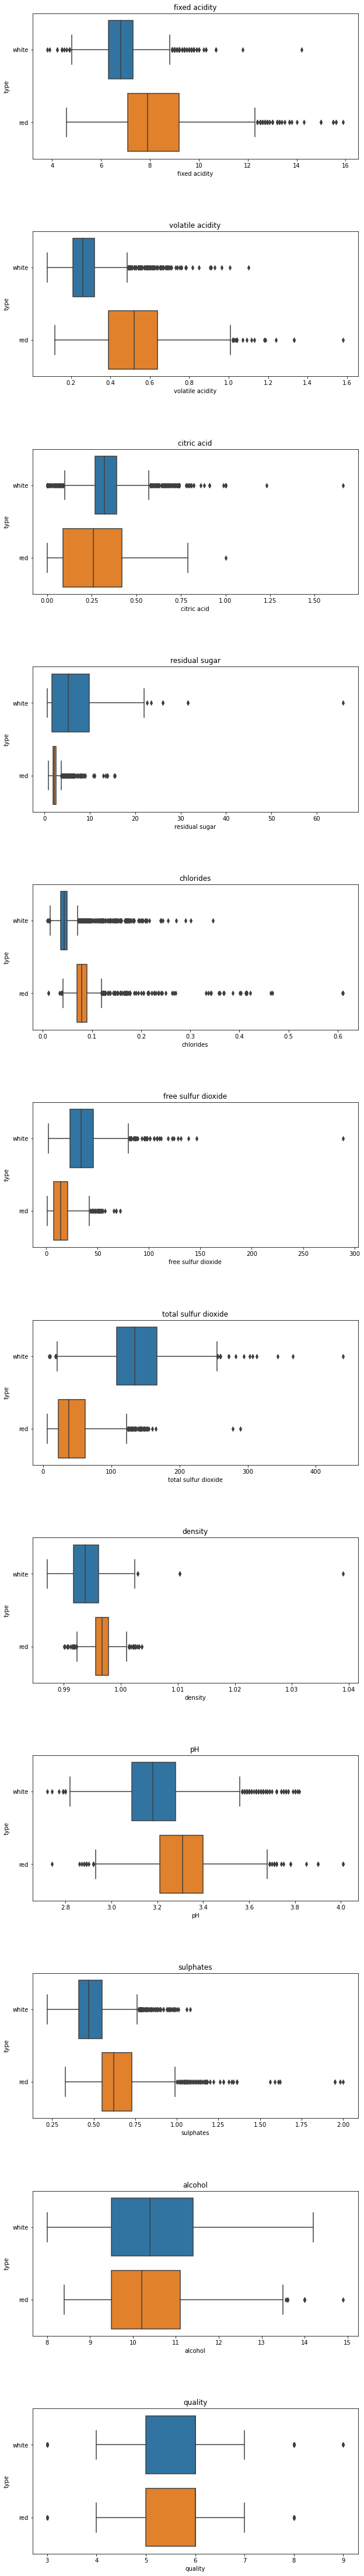

In [20]:
cols_num = [ 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
 'free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','quality']

fig, ax = plt.subplots(nrows=12, ncols=1, figsize=(10,80))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_num):
  
    sns.boxplot(x=col, y='type', data=wine, ax=ax[i])
    ax[i].set_title(col)

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

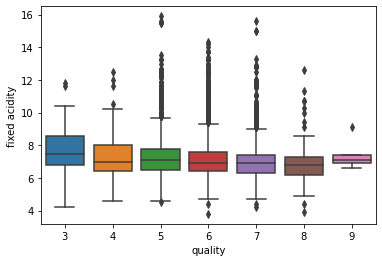

In [21]:
sns.boxplot(x='quality', y='fixed acidity', data= wine)

## Limpieza Variables


### Fixed Acidity

In [22]:
def plot_num(var):
    
    plt.subplot(1,2,2)
    sns.boxplot(x='type',y=var,data=wine);

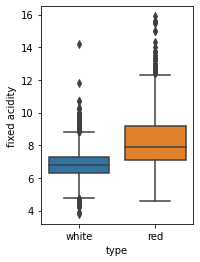

In [23]:
plot_num('fixed acidity')

In [24]:
dfq1 = wine.loc[ : , ["type","fixed acidity"] ].groupby( ["type"] , as_index = False ).quantile(0.25)
dfq1.columns = ["type","fixed acidity_q1"]

dfq2 = wine.loc[ : , ["type","fixed acidity"] ].groupby( ["type"] , as_index = False ).quantile(0.5)
dfq2.columns = ["type","fixed acidity_q2"]

dfq3 = wine.loc[ : , ["type","fixed acidity"] ].groupby( ["type"] , as_index = False ).quantile(0.75)
dfq3.columns = ["type","fixed acidity_q3"]

df_iqr = dfq1.merge( dfq3 , on=["type"] , how="inner" ).merge( dfq2 , on=["type"] , how="inner" )

df_iqr["iqr"] = df_iqr.apply( lambda r: r["fixed acidity_q3"] - r["fixed acidity_q1"] , axis = 1)

df_iqr["upper"] = df_iqr.apply( lambda r: ( r["fixed acidity_q3"] + 1.5*r["iqr"] ) , axis = 1)
df_iqr["lower"] = df_iqr.apply( lambda r: ( r["fixed acidity_q1"] - 1.5*r["iqr"] ) , axis = 1)

wine = wine.merge( df_iqr , on=["type"] , how="left" ).copy()

def getRealFixedacidity(r):
    if ( r["fixed acidity"] <= r["lower"] ) | ( r["fixed acidity"] >= r["upper"] ):
        return r["fixed acidity_q2"]
    else:
        return r["fixed acidity"]
    
wine.apply( lambda r: getRealFixedacidity(r) , axis = 1 )

wine["fixed acidity2"] = wine.apply( lambda r: getRealFixedacidity(r) , axis = 1 )

wine.drop(columns = ["fixed acidity_q1","fixed acidity_q2","fixed acidity_q3","iqr","upper","lower"], inplace = True)

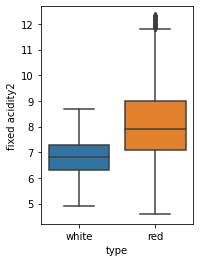

In [25]:
plot_num('fixed acidity2')

### Volatile Acidity

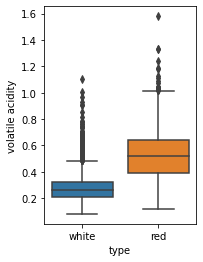

In [26]:
plot_num('volatile acidity')

In [27]:
dfq1 = wine.loc[ : , ["type","volatile acidity"] ].groupby( ["type"] , as_index = False ).quantile(0.25)
dfq1.columns = ["type","volatile acidity_q1"]

dfq2 = wine.loc[ : , ["type","volatile acidity"] ].groupby( ["type"] , as_index = False ).quantile(0.5)
dfq2.columns = ["type","volatile acidity_q2"]

dfq3 = wine.loc[ : , ["type","volatile acidity"] ].groupby( ["type"] , as_index = False ).quantile(0.75)
dfq3.columns = ["type","volatile acidity_q3"]

df_iqr = dfq1.merge( dfq3 , on=["type"] , how="inner" ).merge( dfq2 , on=["type"] , how="inner" )

df_iqr["iqr"] = df_iqr.apply( lambda r: r["volatile acidity_q3"] - r["volatile acidity_q1"] , axis = 1)

df_iqr["upper"] = df_iqr.apply( lambda r: ( r["volatile acidity_q3"] + 1.5*r["iqr"] ) , axis = 1)
df_iqr["lower"] = df_iqr.apply( lambda r: ( r["volatile acidity_q1"] - 1.5*r["iqr"] ) , axis = 1)

wine = wine.merge( df_iqr , on=["type"] , how="left" ).copy()

def getRealVolatileacidity(r):
    if ( r["volatile acidity"] <= r["lower"] ) | ( r["volatile acidity"] >= r["upper"] ):
        return r["volatile acidity_q2"]
    else:
        return r["volatile acidity"]
    
wine.apply( lambda r: getRealVolatileacidity(r) , axis = 1 )

wine["volatile acidity2"] = wine.apply( lambda r: getRealVolatileacidity(r) , axis = 1 )

wine.drop(columns = ["volatile acidity_q1","volatile acidity_q2","volatile acidity_q3","iqr","upper","lower"], inplace = True)

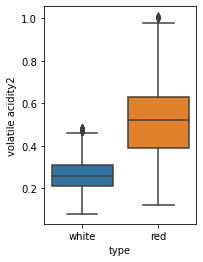

In [28]:
plot_num('volatile acidity2')

### Citrid Acid

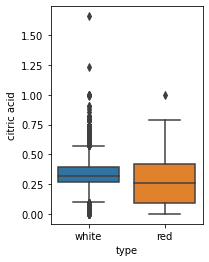

In [29]:
plot_num('citric acid')

In [30]:
dfq1 = wine.loc[ : , ["type","citric acid"] ].groupby( ["type"] , as_index = False ).quantile(0.25)
dfq1.columns = ["type","citric acid_q1"]

dfq2 = wine.loc[ : , ["type","citric acid"] ].groupby( ["type"] , as_index = False ).quantile(0.5)
dfq2.columns = ["type","citric acid_q2"]

dfq3 = wine.loc[ : , ["type","citric acid"] ].groupby( ["type"] , as_index = False ).quantile(0.75)
dfq3.columns = ["type","citric acid_q3"]

df_iqr = dfq1.merge( dfq3 , on=["type"] , how="inner" ).merge( dfq2 , on=["type"] , how="inner" )

df_iqr["iqr"] = df_iqr.apply( lambda r: r["citric acid_q3"] - r["citric acid_q1"] , axis = 1)

df_iqr["upper"] = df_iqr.apply( lambda r: ( r["citric acid_q3"] + 1.5*r["iqr"] ) , axis = 1)
df_iqr["lower"] = df_iqr.apply( lambda r: ( r["citric acid_q1"] - 1.5*r["iqr"] ) , axis = 1)

wine = wine.merge( df_iqr , on=["type"] , how="left" ).copy()

def getRealCitricAcid(r):
    if ( r["citric acid"] <= r["lower"] ) | ( r["citric acid"] >= r["upper"] ):
        return r["citric acid_q2"]
    else:
        return r["citric acid"]
    
wine.apply( lambda r: getRealCitricAcid(r) , axis = 1 )

wine["citric acid2"] = wine.apply( lambda r: getRealCitricAcid(r) , axis = 1 )

wine.drop(columns = ["citric acid_q1","citric acid_q2","citric acid_q3","iqr","upper","lower"], inplace = True)

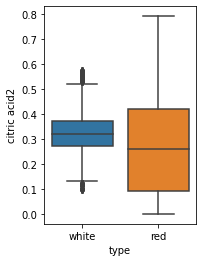

In [31]:
plot_num('citric acid2')

### Residual Sugar

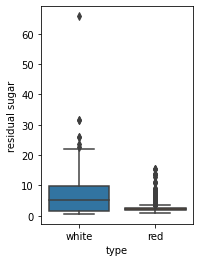

In [32]:
plot_num('residual sugar')

In [33]:
dfq1 = wine.loc[ : , ["type","residual sugar"] ].groupby( ["type"] , as_index = False ).quantile(0.25)
dfq1.columns = ["type","residual sugar_q1"]

dfq2 = wine.loc[ : , ["type","residual sugar"] ].groupby( ["type"] , as_index = False ).quantile(0.5)
dfq2.columns = ["type","residual sugar_q2"]

dfq3 = wine.loc[ : , ["type","residual sugar"] ].groupby( ["type"] , as_index = False ).quantile(0.75)
dfq3.columns = ["type","residual sugar_q3"]

df_iqr = dfq1.merge( dfq3 , on=["type"] , how="inner" ).merge( dfq2 , on=["type"] , how="inner" )

df_iqr["iqr"] = df_iqr.apply( lambda r: r["residual sugar_q3"] - r["residual sugar_q1"] , axis = 1)

df_iqr["upper"] = df_iqr.apply( lambda r: ( r["residual sugar_q3"] + 1.5*r["iqr"] ) , axis = 1)
df_iqr["lower"] = df_iqr.apply( lambda r: ( r["residual sugar_q1"] - 1.5*r["iqr"] ) , axis = 1)

wine = wine.merge( df_iqr , on=["type"] , how="left" ).copy()

def getRealResidualsugar(r):
    if ( r["residual sugar"] <= r["lower"] ) | ( r["residual sugar"] >= r["upper"] ):
        return r["residual sugar_q2"]
    else:
        return r["residual sugar"]
    
wine.apply( lambda r: getRealResidualsugar(r) , axis = 1 )

wine["residual sugar2"] = wine.apply( lambda r: getRealResidualsugar(r) , axis = 1 )

wine.drop(columns = ["residual sugar_q1","residual sugar_q2","residual sugar_q3","iqr","upper","lower"], inplace = True)

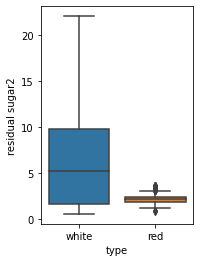

In [34]:
plot_num('residual sugar2')

### Chlorides

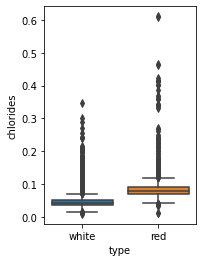

In [35]:
plot_num('chlorides')

In [36]:
dfq1 = wine.loc[ : , ["type","chlorides"] ].groupby( ["type"] , as_index = False ).quantile(0.25)
dfq1.columns = ["type","chlorides_q1"]

dfq2 = wine.loc[ : , ["type","chlorides"] ].groupby( ["type"] , as_index = False ).quantile(0.5)
dfq2.columns = ["type","chlorides_q2"]

dfq3 = wine.loc[ : , ["type","chlorides"] ].groupby( ["type"] , as_index = False ).quantile(0.75)
dfq3.columns = ["type","chlorides_q3"]

df_iqr = dfq1.merge( dfq3 , on=["type"] , how="inner" ).merge( dfq2 , on=["type"] , how="inner" )

df_iqr["iqr"] = df_iqr.apply( lambda r: r["chlorides_q3"] - r["chlorides_q1"] , axis = 1)

df_iqr["upper"] = df_iqr.apply( lambda r: ( r["chlorides_q3"] + 1.5*r["iqr"] ) , axis = 1)
df_iqr["lower"] = df_iqr.apply( lambda r: ( r["chlorides_q1"] - 1.5*r["iqr"] ) , axis = 1)

wine = wine.merge( df_iqr , on=["type"] , how="left" ).copy()

def getRealChlorides(r):
    if ( r["chlorides"] <= r["lower"] ) | ( r["chlorides"] >= r["upper"] ):
        return r["chlorides_q2"]
    else:
        return r["chlorides"]
    
wine.apply( lambda r: getRealChlorides(r) , axis = 1 )

wine["chlorides2"] = wine.apply( lambda r: getRealChlorides(r) , axis = 1 )

wine.drop(columns = ["chlorides_q1","chlorides_q2","chlorides_q3","iqr","upper","lower"], inplace = True)

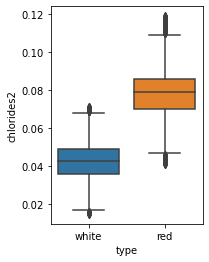

In [37]:
plot_num('chlorides2')

### free sulfur dioxide

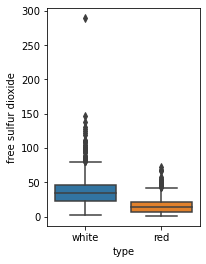

In [38]:
plot_num('free sulfur dioxide')

In [39]:
dfq1 = wine.loc[ : , ["type","free sulfur dioxide"] ].groupby( ["type"] , as_index = False ).quantile(0.25)
dfq1.columns = ["type","fsd_q1"]

dfq2 = wine.loc[ : , ["type","free sulfur dioxide"] ].groupby( ["type"] , as_index = False ).quantile(0.5)
dfq2.columns = ["type","fsd_q2"]

dfq3 = wine.loc[ : , ["type","free sulfur dioxide"] ].groupby( ["type"] , as_index = False ).quantile(0.75)
dfq3.columns = ["type","fsd_q3"]

df_iqr = dfq1.merge( dfq3 , on=["type"] , how="inner" ).merge( dfq2 , on=["type"] , how="inner" )

df_iqr["iqr"] = df_iqr.apply( lambda r: r["fsd_q3"] - r["fsd_q1"] , axis = 1)

df_iqr["upper"] = df_iqr.apply( lambda r: ( r["fsd_q3"] + 1.5*r["iqr"] ) , axis = 1)
df_iqr["lower"] = df_iqr.apply( lambda r: ( r["fsd_q1"] - 1.5*r["iqr"] ) , axis = 1)

wine = wine.merge( df_iqr , on=["type"] , how="left" ).copy()

def getRealFsd(r):
    if ( r["free sulfur dioxide"] <= r["lower"] ) | ( r["free sulfur dioxide"] >= r["upper"] ):
        return r["fsd_q2"]
    else:
        return r["free sulfur dioxide"]
    
wine.apply( lambda r: getRealFsd(r) , axis = 1 )

wine["free sulfur dioxide2"] = wine.apply( lambda r: getRealFsd(r) , axis = 1 )

wine.drop(columns = ["fsd_q1","fsd_q2","fsd_q3","iqr","upper","lower"], inplace = True)

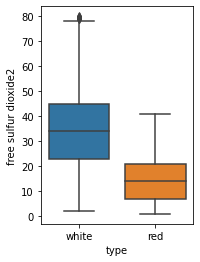

In [40]:
plot_num('free sulfur dioxide2')

### total sulfur dioxide

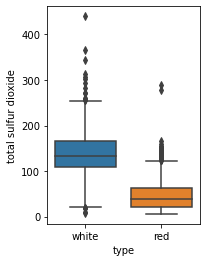

In [41]:
plot_num('total sulfur dioxide')

In [42]:
dfq1 = wine.loc[ : , ["type","total sulfur dioxide"] ].groupby( ["type"] , as_index = False ).quantile(0.25)
dfq1.columns = ["type","tsd_q1"]

dfq2 = wine.loc[ : , ["type","total sulfur dioxide"] ].groupby( ["type"] , as_index = False ).quantile(0.5)
dfq2.columns = ["type","tsd_q2"]

dfq3 = wine.loc[ : , ["type","total sulfur dioxide"] ].groupby( ["type"] , as_index = False ).quantile(0.75)
dfq3.columns = ["type","tsd_q3"]

df_iqr = dfq1.merge( dfq3 , on=["type"] , how="inner" ).merge( dfq2 , on=["type"] , how="inner" )

df_iqr["iqr"] = df_iqr.apply( lambda r: r["tsd_q3"] - r["tsd_q1"] , axis = 1)

df_iqr["upper"] = df_iqr.apply( lambda r: ( r["tsd_q3"] + 1.5*r["iqr"] ) , axis = 1)
df_iqr["lower"] = df_iqr.apply( lambda r: ( r["tsd_q1"] - 1.5*r["iqr"] ) , axis = 1)

wine = wine.merge( df_iqr , on=["type"] , how="left" ).copy()

def getRealTsd(r):
    if ( r["total sulfur dioxide"] <= r["lower"] ) | ( r["total sulfur dioxide"] >= r["upper"] ):
        return r["tsd_q2"]
    else:
        return r["total sulfur dioxide"]
    
wine.apply( lambda r: getRealTsd(r) , axis = 1 )

wine["total sulfur dioxide2"] = wine.apply( lambda r: getRealTsd(r) , axis = 1 )

wine.drop(columns = ["tsd_q1","tsd_q2","tsd_q3","iqr","upper","lower"], inplace = True)

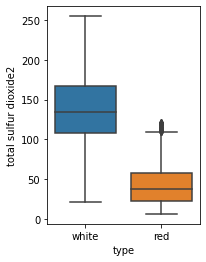

In [43]:
plot_num('total sulfur dioxide2')

### density

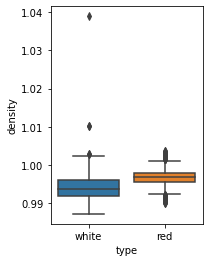

In [44]:
plot_num('density')

In [45]:
dfq1 = wine.loc[ : , ["type","density"] ].groupby( ["type"] , as_index = False ).quantile(0.25)
dfq1.columns = ["type","density_q1"]

dfq2 = wine.loc[ : , ["type","density"] ].groupby( ["type"] , as_index = False ).quantile(0.5)
dfq2.columns = ["type","density_q2"]

dfq3 = wine.loc[ : , ["type","density"] ].groupby( ["type"] , as_index = False ).quantile(0.75)
dfq3.columns = ["type","density_q3"]

df_iqr = dfq1.merge( dfq3 , on=["type"] , how="inner" ).merge( dfq2 , on=["type"] , how="inner" )

df_iqr["iqr"] = df_iqr.apply( lambda r: r["density_q3"] - r["density_q1"] , axis = 1)

df_iqr["upper"] = df_iqr.apply( lambda r: ( r["density_q3"] + 1.5*r["iqr"] ) , axis = 1)
df_iqr["lower"] = df_iqr.apply( lambda r: ( r["density_q1"] - 1.5*r["iqr"] ) , axis = 1)

wine = wine.merge( df_iqr , on=["type"] , how="left" ).copy()

def getRealDensity(r):
    if ( r["density"] <= r["lower"] ) | ( r["density"] >= r["upper"] ):
        return r["density_q2"]
    else:
        return r["density"]
    
wine.apply( lambda r: getRealDensity(r) , axis = 1 )

wine["density2"] = wine.apply( lambda r: getRealDensity(r) , axis = 1 )

wine.drop(columns = ["density_q1","density_q2","density_q3","iqr","upper","lower"], inplace = True)

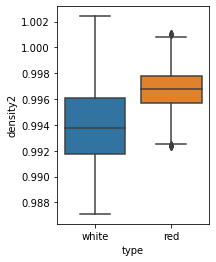

In [46]:
plot_num('density2')

### pH

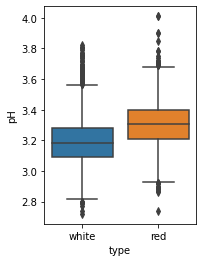

In [47]:
plot_num('pH')

In [48]:
dfq1 = wine.loc[ : , ["type","pH"] ].groupby( ["type"] , as_index = False ).quantile(0.25)
dfq1.columns = ["type","pH_q1"]

dfq2 = wine.loc[ : , ["type","pH"] ].groupby( ["type"] , as_index = False ).quantile(0.5)
dfq2.columns = ["type","pH_q2"]

dfq3 = wine.loc[ : , ["type","pH"] ].groupby( ["type"] , as_index = False ).quantile(0.75)
dfq3.columns = ["type","pH_q3"]

df_iqr = dfq1.merge( dfq3 , on=["type"] , how="inner" ).merge( dfq2 , on=["type"] , how="inner" )

df_iqr["iqr"] = df_iqr.apply( lambda r: r["pH_q3"] - r["pH_q1"] , axis = 1)

df_iqr["upper"] = df_iqr.apply( lambda r: ( r["pH_q3"] + 1.5*r["iqr"] ) , axis = 1)
df_iqr["lower"] = df_iqr.apply( lambda r: ( r["pH_q1"] - 1.5*r["iqr"] ) , axis = 1)

wine = wine.merge( df_iqr , on=["type"] , how="left" ).copy()

def getRealpH(r):
    if ( r["pH"] <= r["lower"] ) | ( r["pH"] >= r["upper"] ):
        return r["pH_q2"]
    else:
        return r["pH"]
    
wine.apply( lambda r: getRealpH(r) , axis = 1 )

wine["pH 2"] = wine.apply( lambda r: getRealpH(r) , axis = 1 )

wine.drop(columns = ["pH_q1","pH_q2","pH_q3","iqr","upper","lower"], inplace = True)

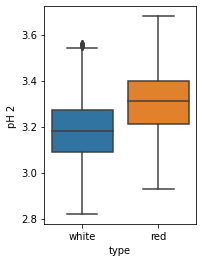

In [49]:
plot_num('pH 2')

### sulphates

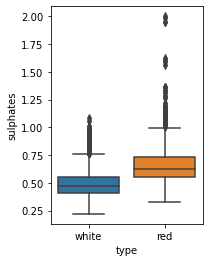

In [50]:
plot_num('sulphates')

In [51]:
dfq1 = wine.loc[ : , ["type","sulphates"] ].groupby( ["type"] , as_index = False ).quantile(0.25)
dfq1.columns = ["type","sulphates_q1"]

dfq2 = wine.loc[ : , ["type","sulphates"] ].groupby( ["type"] , as_index = False ).quantile(0.5)
dfq2.columns = ["type","sulphates_q2"]

dfq3 = wine.loc[ : , ["type","sulphates"] ].groupby( ["type"] , as_index = False ).quantile(0.75)
dfq3.columns = ["type","sulphates_q3"]

df_iqr = dfq1.merge( dfq3 , on=["type"] , how="inner" ).merge( dfq2 , on=["type"] , how="inner" )

df_iqr["iqr"] = df_iqr.apply( lambda r: r["sulphates_q3"] - r["sulphates_q1"] , axis = 1)

df_iqr["upper"] = df_iqr.apply( lambda r: ( r["sulphates_q3"] + 1.5*r["iqr"] ) , axis = 1)
df_iqr["lower"] = df_iqr.apply( lambda r: ( r["sulphates_q1"] - 1.5*r["iqr"] ) , axis = 1)

wine = wine.merge( df_iqr , on=["type"] , how="left" ).copy()

def getRealSulphates(r):
    if ( r["sulphates"] <= r["lower"] ) | ( r["sulphates"] >= r["upper"] ):
        return r["sulphates_q2"]
    else:
        return r["sulphates"]
    
wine.apply( lambda r: getRealSulphates(r) , axis = 1 )

wine["sulphates2"] = wine.apply( lambda r: getRealSulphates(r) , axis = 1 )

wine.drop(columns = ["sulphates_q1","sulphates_q2","sulphates_q3","iqr","upper","lower"], inplace = True)

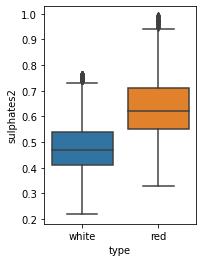

In [52]:
plot_num('sulphates2')

In [53]:
## Se hizo limpieza de todas esas variables debido a que tenian muchos Outliners y tanta cantidad podria entorpecer el aprendizaje
## No haré limpieza de Quality y Alcohol debido al bajo nivel de Outliners que poseen, 
## y pues no siempre deben eliminarse estos ya que todo depende de la variable numérica a la que se está analizando 
## pues estos podrían contener información importante.

In [54]:
#wine.to_csv('wineNew.csv', index = False)

In [55]:
wine2 = pd.read_csv('wineNew.csv')

In [56]:
wine2.drop(columns = ["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates"], inplace = True)

In [57]:
wine2 = wine2.reindex(columns=['type','fixed acidity2','volatile acidity2','citric acid2','residual sugar2','chlorides2','free sulfur dioxide2','total sulfur dioxide2','density2','pH 2','sulphates2','alcohol','quality'])

In [58]:
wine2

,type,fixed acidity2,volatile acidity2,citric acid2,residual sugar2,chlorides2,free sulfur dioxide2,total sulfur dioxide2,density2,pH 2,sulphates2,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.450000,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.490000,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.440000,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.580000,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.531215,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.750000,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.710000,10.2,5


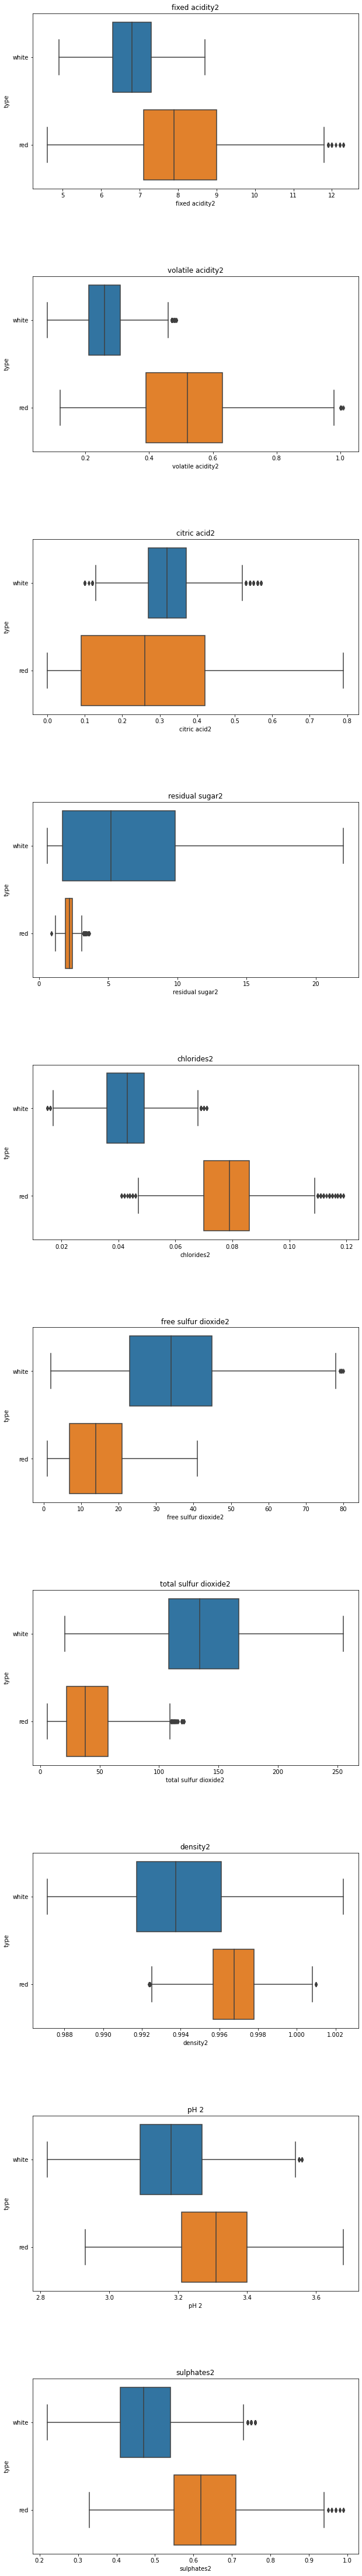

In [59]:
cols_num = [ 'fixed acidity2', 'volatile acidity2', 'citric acid2', 'residual sugar2', 'chlorides2',
 'free sulfur dioxide2','total sulfur dioxide2','density2','pH 2','sulphates2']

fig, ax = plt.subplots(nrows=10, ncols=1, figsize=(10,80))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_num):
  
    sns.boxplot(x=col, y='type', data=wine2, ax=ax[i])
    ax[i].set_title(col)

# Aplique PCA utilizando maximo 5 columnas (evalue si el PCA vale la pena hacer uno para white y otro para red)

<AxesSubplot:>

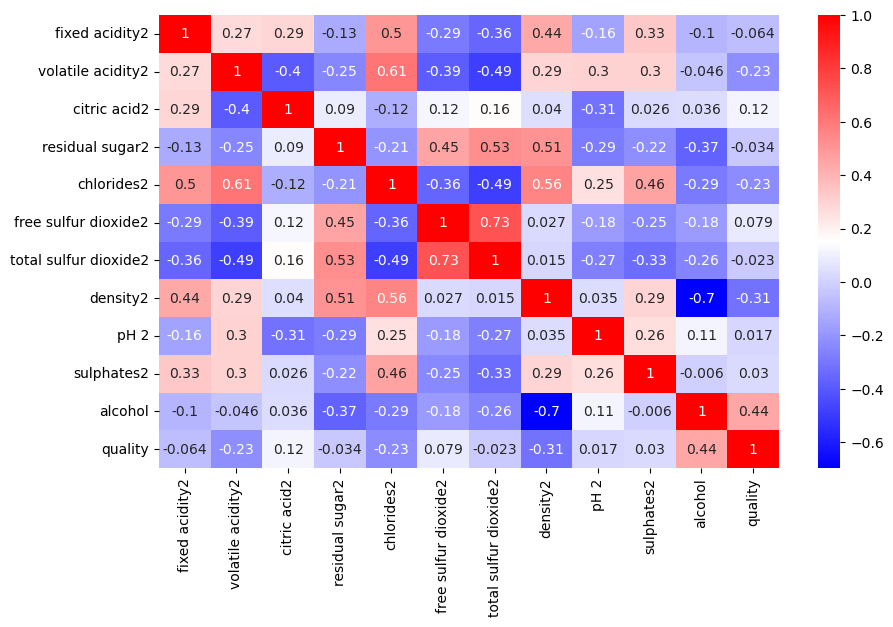

In [60]:
plt.figure(figsize=(10,6),dpi=100)
sns.heatmap(wine2.corr(),cmap='bwr',annot=True)

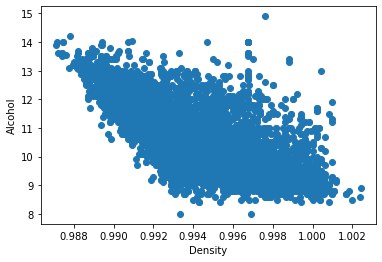

In [61]:
plt.scatter(wine2["density2"], wine["alcohol"])
plt.xlabel("Density") 
plt.ylabel("Alcohol")
plt.show()

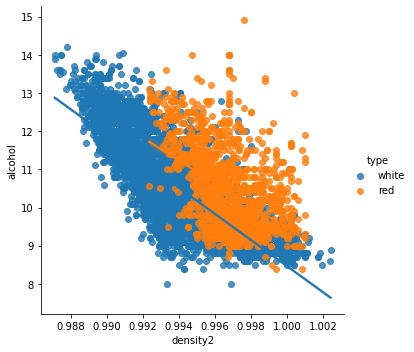

In [62]:
sns.lmplot(x='density2', y='alcohol', hue='type', data= wine2)

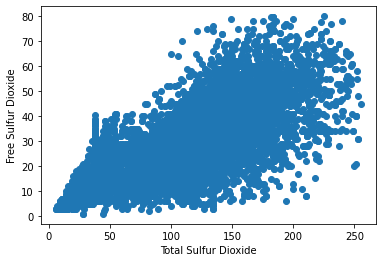

In [63]:
plt.scatter(wine2["total sulfur dioxide2"], wine["free sulfur dioxide2"])
plt.xlabel("Total Sulfur Dioxide") 
plt.ylabel("Free Sulfur Dioxide")
plt.show()

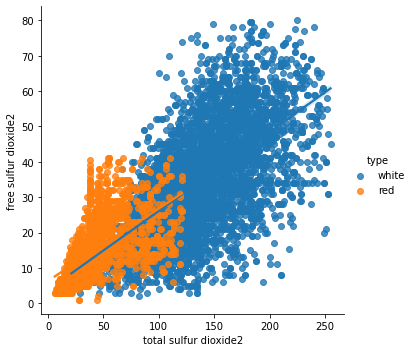

In [64]:
sns.lmplot(x='total sulfur dioxide2', y='free sulfur dioxide2', hue='type', data= wine2)

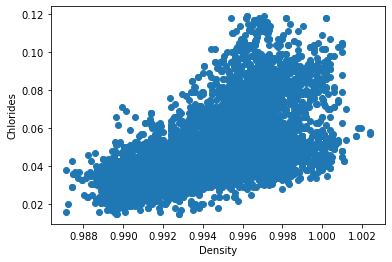

In [65]:
plt.scatter(wine2["density2"], wine["chlorides2"])
plt.xlabel("Density") 
plt.ylabel("Chlorides")
plt.show()

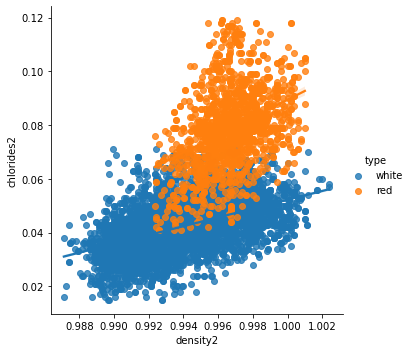

In [66]:
sns.lmplot(x='density2', y='chlorides2', hue='type', data= wine2)

In [67]:
w = wine2.corr()
wine_n=wine2.loc[ : ,['density2','alcohol','chlorides2','total sulfur dioxide2','free sulfur dioxide2']].copy()

In [68]:
wine_white=wine2.loc[wine2['type']=='white']
wine_red=wine2.loc[wine2['type']=='red']
wineW=wine_white.loc[ : ,['fixed acidity2','volatile acidity2','density2','pH 2','alcohol','residual sugar2','citric acid2','chlorides2','sulphates2','total sulfur dioxide2','free sulfur dioxide2']].copy()
wineR=wine_red.loc[ : ,['fixed acidity2','volatile acidity2','density2','pH 2','alcohol','residual sugar2','citric acid2','chlorides2','sulphates2','total sulfur dioxide2','free sulfur dioxide2']].copy()

<AxesSubplot:>

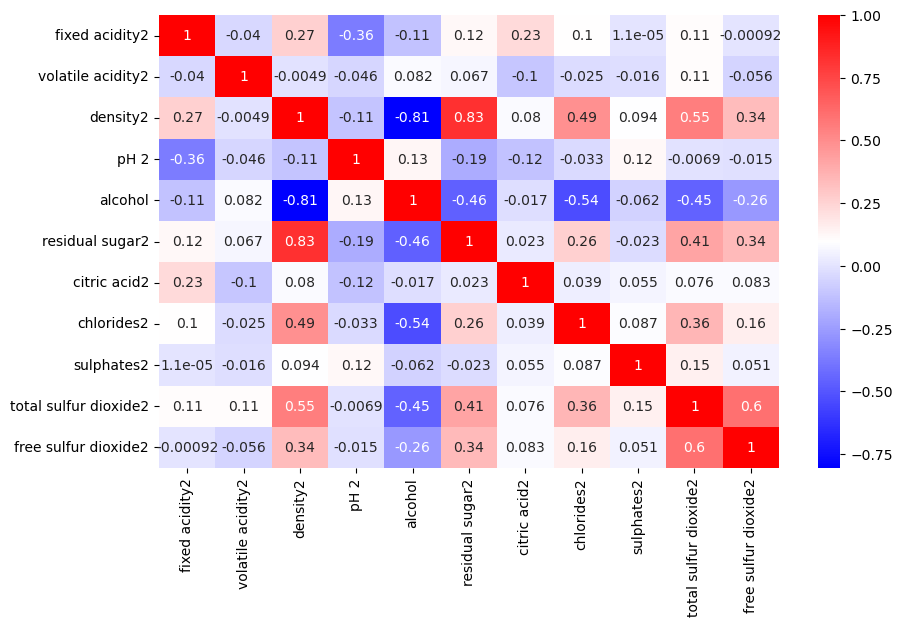

In [69]:
plt.figure(figsize=(10,6),dpi=100)
sns.heatmap(wineW.corr(),cmap='bwr',annot=True)

<AxesSubplot:>

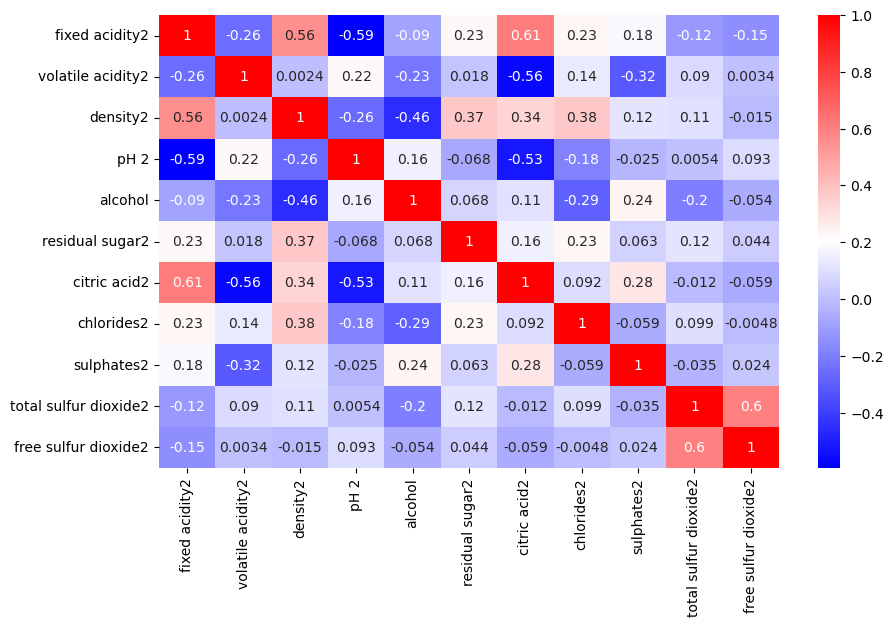

In [70]:
plt.figure(figsize=(10,6),dpi=100)
sns.heatmap(wineR.corr(),cmap='bwr',annot=True)

In [71]:
##Conclusión toma decisión sobre separación de vinos para el PCA (Analizando 5 columnas permitidas).

##Para el vino blanco se observar la correlación en las columnas; alcohol, densidad, free y total sulfur dioxide, residual sugar.
##entre estas el coeficiente de correlación varía entre 0.6-0.8 llevandonos el 0.8 a ser un poco más fuerte en relación.

##Para el vino rojo se observa la correlación en las columnas; free y total sulfur dioxide, pH, fixed acidity, citric acid.
##entre estas el coeficiente de correlación varía entre 0.59 - 0.6 lo cual nos demuestra una correlación moderada.

##Juntos se observa correlación en las columnas; densidad, alcohol, free y total sulfur dioxide, chloride. 
## entre estas el coeficiente de correlación varía entre 0.56 - 0.73 nos sigue mostrando una correlación moderada pero esta vez de ambos,
## por lo cual no se separan debido a que el análisis puede mostrarle al cliente cual de los dos vinos se asemeja más a lo que busca

In [72]:
cols_to_use = [
    "density2"        
    , "total sulfur dioxide2"
    , "free sulfur dioxide2"
    , "chlorides2"
    , "alcohol"    
]

In [73]:
x = wine2.loc[ : , cols_to_use ].values
x

array([[1.0010e+00, 1.7000e+02, 4.5000e+01, 4.5000e-02, 8.8000e+00],
       [9.9400e-01, 1.3200e+02, 1.4000e+01, 4.9000e-02, 9.5000e+00],
       [9.9510e-01, 9.7000e+01, 3.0000e+01, 5.0000e-02, 1.0100e+01],
       ...,
       [9.9574e-01, 4.0000e+01, 2.9000e+01, 7.6000e-02, 1.1000e+01],
       [9.9547e-01, 4.4000e+01, 3.2000e+01, 7.5000e-02, 1.0200e+01],
       [9.9549e-01, 4.2000e+01, 1.8000e+01, 6.7000e-02, 1.1000e+01]])

In [74]:
x = StandardScaler().fit_transform(x)
x

array([[ 2.18497392,  0.98877741,  0.92699752, -0.3320779 , -1.41855821],
       [-0.23465842,  0.31129379, -0.96657885, -0.12323481, -0.83161516],
       [ 0.14556952, -0.31270427,  0.01075089, -0.07102404, -0.32852111],
       ...,
       [ 0.36679305, -1.32892969, -0.05033222,  1.28645608,  0.42611996],
       [ 0.27346437, -1.25761562,  0.13291711,  1.23424531, -0.2446721 ],
       [ 0.2803776 , -1.29327266, -0.72224641,  0.81655912,  0.42611996]])

In [75]:
x = np.around( x , 2 )
np.nan_to_num(x)

array([[ 2.18,  0.99,  0.93, -0.33, -1.42],
       [-0.23,  0.31, -0.97, -0.12, -0.83],
       [ 0.15, -0.31,  0.01, -0.07, -0.33],
       ...,
       [ 0.37, -1.33, -0.05,  1.29,  0.43],
       [ 0.27, -1.26,  0.13,  1.23, -0.24],
       [ 0.28, -1.29, -0.72,  0.82,  0.43]])

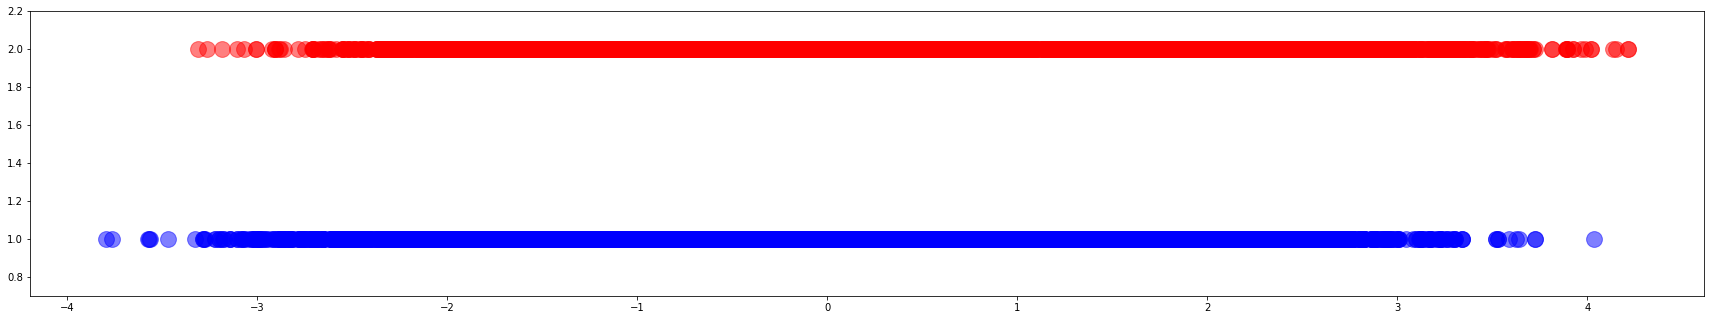

Varianza explicada por cada componente: [2.15229649 1.95947469 0.44093305 0.23116599 0.21726758]
Proporción de varianza explicada por cada componente: [0.43036136 0.39180578 0.08816655 0.04622268 0.04344363]


In [76]:
pca = PCA()
x_pca = pca.fit_transform(x)

#Código visualización
plt.figure(figsize=(30,30))
plt.axes().set_aspect("equal")
plt.scatter(x_pca[:, 0], [2]*x_pca[:, 0].size, s=250, color="red", alpha=0.5)
plt.scatter(x_pca[:, 1], [1]*x_pca[:, 0].size, s=250, color="blue", alpha=0.5)
plt.ylim((0.7, 2.2))
plt.show()
print("Varianza explicada por cada componente:", pca.explained_variance_)
print("Proporción de varianza explicada por cada componente:", pca.explained_variance_ratio_)

In [77]:
new_pca = PCA(n_components=2)
new_x = new_pca.fit_transform(x)
new_x

array([[ 0.06116779,  2.76280074],
       [ 0.29924649,  0.09980117],
       [ 0.23365504,  0.14096579],
       ...,
       [ 1.49731123, -0.51789391],
       [ 1.4455645 , -0.06784839],
       [ 1.46635848, -0.87525794]])

In [78]:
x2 = np.around( new_x , 2 )
np.nan_to_num(x2)

array([[ 0.06,  2.76],
       [ 0.3 ,  0.1 ],
       [ 0.23,  0.14],
       ...,
       [ 1.5 , -0.52],
       [ 1.45, -0.07],
       [ 1.47, -0.88]])

In [79]:
pcadf = pd.DataFrame(data=new_x ,columns=['c1','c2']) 

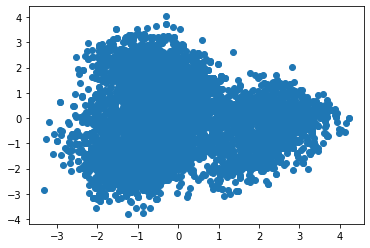

In [80]:
plt.scatter( pcadf['c1'] , pcadf['c2'] )

### K means

In [81]:
km = KMeans( n_clusters=3  ).fit(pcadf)
km.cluster_centers_

array([[-0.53522902,  1.42904242],
       [ 2.16166127, -0.27860913],
       [-0.92672903, -1.1743648 ]])

In [82]:
cetroids = km.cluster_centers_

In [83]:
km.labels_

array([0, 0, 0, ..., 1, 1, 1])

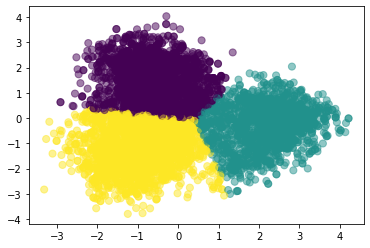

In [84]:
plt.scatter( pcadf['c1'] , pcadf['c2'] , c=km.labels_.astype(float) , s=50, alpha=0.5 )

In [85]:
wine_n['cluster'] = km.labels_
wine_n

,density2,alcohol,chlorides2,total sulfur dioxide2,free sulfur dioxide2,cluster
0,1.00100,8.8,0.045,170.0,45.0,0
1,0.99400,9.5,0.049,132.0,14.0,0
2,0.99510,10.1,0.050,97.0,30.0,0
3,0.99560,9.9,0.058,186.0,47.0,0
4,0.99560,9.9,0.058,186.0,47.0,0
...,...,...,...,...,...,...
6492,0.99490,10.5,0.090,44.0,32.0,1
6493,0.99512,11.2,0.062,51.0,39.0,1
6494,0.99574,11.0,0.076,40.0,29.0,1
6495,0.99547,10.2,0.075,44.0,32.0,1


In [86]:
wine_n.loc[ wine_n['cluster'] == 0 , : ].describe()

,density2,alcohol,chlorides2,total sulfur dioxide2,free sulfur dioxide2,cluster
count,2356.000000,2356.000000,2356.000000,2356.000000,2356.000000,2356.0
mean,0.996272,9.572114,0.047313,164.946732,42.472199,0.0
std,0.002061,0.591630,0.007881,34.122771,14.261628,0.0
min,0.990960,8.000000,0.019000,79.000000,6.000000,0.0
25%,0.994800,9.100000,0.042000,140.000000,32.000000,0.0
50%,0.996120,9.500000,0.047000,164.000000,42.000000,0.0
75%,0.997900,10.000000,0.052000,189.000000,53.000000,0.0
max,1.002410,12.000000,0.071000,255.000000,80.000000,0.0


In [87]:
wine_n.loc[ wine_n['cluster'] == 1 , : ].describe()

,density2,alcohol,chlorides2,total sulfur dioxide2,free sulfur dioxide2,cluster
count,1653.000000,1653.000000,1653.000000,1653.000000,1653.000000,1653.0
mean,0.996716,10.268562,0.077805,45.809437,14.669994,1.0
std,0.001627,0.954254,0.015069,29.138150,8.678085,0.0
min,0.992350,8.400000,0.032000,6.000000,1.000000,1.0
25%,0.995600,9.500000,0.069000,23.000000,7.000000,1.0
50%,0.996720,10.000000,0.079000,38.000000,13.000000,1.0
75%,0.997790,10.900000,0.086000,63.000000,20.000000,1.0
max,1.001000,14.900000,0.119000,151.000000,41.000000,1.0


In [88]:
wine_n.loc[ wine_n['cluster'] == 2 , : ].describe()

,density2,alcohol,chlorides2,total sulfur dioxide2,free sulfur dioxide2,cluster
count,2488.000000,2488.000000,2488.000000,2488.000000,2488.000000,2488.0
mean,0.991817,11.511012,0.037623,112.470257,27.914992,2.0
std,0.001652,0.951727,0.008922,31.641420,12.235300,0.0
min,0.987110,8.800000,0.015000,7.000000,2.000000,2.0
25%,0.990607,10.800000,0.031000,93.000000,19.000000,2.0
50%,0.991775,11.400000,0.037000,112.000000,27.000000,2.0
75%,0.992960,12.200000,0.043000,132.000000,36.000000,2.0
max,0.997700,14.200000,0.075000,249.500000,75.000000,2.0


## Explicación de perfiles 

Nota: Todos los vinos segun clústers tienen la misma densidad.

* Perfil 1 (Cluster 0)
En este perfil tenemos a los vinos promedios los cuales contienen; una mayor cantidad de alcohol, son bajos en sal, su nivel de sulfur total es bueno por lo que se conserva bien y además el sulfur libre que le queda es considerable.

* Perfil 2 (Cluster 1) 
En este perfil tenemos a los vinos de excelente calidad, su nivel de alcohol no es tan alto como el de los vinos promedio sin embargo varían en una diferencia de 3 puntos, el nivel de sal que contiene es solo un 0.1 mayor que el de los vinos regulares, su nivel de sulfur total es excelente debido a que fue el más alto de los 3 perfiles lo que significa que su conservación es duradera al igual que su sulfur libre tiene una alta probabilidad de seguirse conservando.

* Perfil 3 (Cluster 2)
En este perfil tenemos a los vinos de baja calidad, aunque su nivel de alcohol es 0.7 mayor al del vino de excelente calidad no significa que sea mejor, su nivel de sal es alto en comparación a los vinos de calidad y a los promedio diferenciandose en un 0.3 del vino de calidad y en un 0.4 al vino promedio, su nivel de sulfur total tanto como su sulfur libre son muy bajos lo que nos indica que su preservación es baja, tanto como para decir que su consumo tiene muy poca preservación luego de su producción. 

###  Agregue la nueva variable al dateset y elimine las columnas que hayan formado parte de analisis del PCA, tanto para white como para red, en caso que hayan sido entrenamientos distintos.

In [89]:
wine2['cluster'] = km.labels_

In [90]:
wine2

,type,fixed acidity2,volatile acidity2,citric acid2,residual sugar2,chlorides2,free sulfur dioxide2,total sulfur dioxide2,density2,pH 2,sulphates2,alcohol,quality,cluster
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.450000,8.8,6,0
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.490000,9.5,6,0
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.440000,10.1,6,0
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6,0
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.580000,10.5,5,1
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.531215,11.2,6,1
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.750000,11.0,6,1
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.710000,10.2,5,1


In [91]:
#wine2.to_csv('wines.csv', index = False)
wines = pd.read_csv('wines.csv')

In [92]:
wines.drop(columns = ["density2","alcohol","chlorides2","total sulfur dioxide2","free sulfur dioxide2"], inplace = True)

In [93]:
wines

,type,fixed acidity2,volatile acidity2,citric acid2,residual sugar2,pH 2,sulphates2,quality,cluster
0,white,7.0,0.270,0.36,20.7,3.00,0.450000,6,0
1,white,6.3,0.300,0.34,1.6,3.30,0.490000,6,0
2,white,8.1,0.280,0.40,6.9,3.26,0.440000,6,0
3,white,7.2,0.230,0.32,8.5,3.19,0.400000,6,0
4,white,7.2,0.230,0.32,8.5,3.19,0.400000,6,0
...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,3.45,0.580000,5,1
6493,red,5.9,0.550,0.10,2.2,3.52,0.531215,6,1
6494,red,6.3,0.510,0.13,2.3,3.42,0.750000,6,1
6495,red,5.9,0.645,0.12,2.0,3.57,0.710000,5,1


##  Crea la varible de respuesta de la siguiente manera:
    - if quality >= 5 ? 1 else 0

In [94]:
wines.loc[ : , ["quality"] ].value_counts()

quality
6          2836
5          2138
7          1079
4           216
8           193
3            30
9             5
dtype: int64

In [95]:
wines["review"] = wines.apply( lambda r: (1 if r['quality'] >= 5 else 0) , axis = 1)

In [96]:
wines

,type,fixed acidity2,volatile acidity2,citric acid2,residual sugar2,pH 2,sulphates2,quality,cluster,review
0,white,7.0,0.270,0.36,20.7,3.00,0.450000,6,0,1
1,white,6.3,0.300,0.34,1.6,3.30,0.490000,6,0,1
2,white,8.1,0.280,0.40,6.9,3.26,0.440000,6,0,1
3,white,7.2,0.230,0.32,8.5,3.19,0.400000,6,0,1
4,white,7.2,0.230,0.32,8.5,3.19,0.400000,6,0,1
...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,3.45,0.580000,5,1,1
6493,red,5.9,0.550,0.10,2.2,3.52,0.531215,6,1,1
6494,red,6.3,0.510,0.13,2.3,3.42,0.750000,6,1,1
6495,red,5.9,0.645,0.12,2.0,3.57,0.710000,5,1,1


In [97]:
wines.loc[ : , ["review"] ].value_counts()

review
1         6251
0          246
dtype: int64

In [98]:
wines.drop(columns = ["quality"], inplace = True)

##  Aplique los siguientes entrenamientos de MLS (evalue primero si vale la pena estretificar por type):
    - Regresion Logistica
    - NN
    - Aroboles de desiciones
    - Random Forest

In [99]:
wine_mls = wine2.copy()
wine_mls = wine_mls.drop(columns = ['type','quality'])
wine_mls['review'] = wines['review']

### Regresión Logística

In [101]:
wine_mls

,fixed acidity2,volatile acidity2,citric acid2,residual sugar2,chlorides2,free sulfur dioxide2,total sulfur dioxide2,density2,pH 2,sulphates2,alcohol,cluster,review
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.450000,8.8,0,1
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.490000,9.5,0,1
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.440000,10.1,0,1
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,0,1
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.580000,10.5,1,1
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.531215,11.2,1,1
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.750000,11.0,1,1
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.710000,10.2,1,1


In [105]:
features_col = wine_mls.columns.values[0:11]

In [106]:
X = wine_mls[features_col].values
y = wine_mls["review"].values

X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size = 0.25, random_state=0)

In [107]:
log_model = LogisticRegression(solver='lbfgs', max_iter=1000)
log_model.fit(X_train,Y_train)

LogisticRegression(max_iter=1000)

wine_lr = LogisticRegression()
wine_lr.fit(X_train, Y_train)
lr_predict = wine_lr.predict(X_test)

In [109]:
y_pred = log_model.predict(X_test)

In [110]:
log_model.predict_proba(X_test)[:] 

array([[0.02490123, 0.97509877],
       [0.0576696 , 0.9423304 ],
       [0.02828205, 0.97171795],
       ...,
       [0.1320722 , 0.8679278 ],
       [0.00265414, 0.99734586],
       [0.0601298 , 0.9398702 ]])

In [111]:
cnf_matrix = metrics.confusion_matrix(Y_test, y_pred)
lr_acc_score = accuracy_score(Y_test, y_pred)

cnf_matrix

array([[   0,   66],
       [   0, 1559]], dtype=int64)

Text(0.5, 257.44, 'Etiqueta de prediccion')

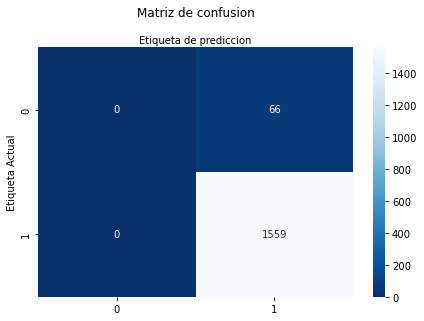

In [112]:
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap="Blues_r", fmt="g")
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Matriz de confusion", y=1.1)
plt.ylabel("Etiqueta Actual")
plt.xlabel("Etiqueta de prediccion")

In [113]:
## Obtuvimos un 95% de acertividad con la regresión logística
print(lr_acc_score)

0.9593846153846154


### Neural Network

In [114]:
x_train = X_train 
x_test = X_test
y_train = Y_train
y_test =  Y_test 

In [115]:
NN = MLPClassifier(random_state=1, max_iter=3000)

# Entrenamiento del modelo en los datos y etiquetas de entrenamiento
NN.fit(x_train, y_train)

# testeando el modelo i.e o sea predecir las etiquetas de los datos de prueba.
y_pred = NN.predict(x_test)

# Evaluación sobre los resultados del modelo
accuracy = accuracy_score(y_test,y_pred)*100
confusion_mat = confusion_matrix(y_test,y_pred)

In [116]:
print(metrics.accuracy_score(y_test,y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.9593846153846154
0.9593846153846154
1.0
0.9792713567839196


In [117]:
## El nivel de acertividad al igual que la regresión logistica es del 95%
NN_acc_score = accuracy_score(Y_test, y_pred)
print(NN_acc_score)

0.9593846153846154


## Arbol de decisiones

In [118]:
dtw = tree.DecisionTreeClassifier(random_state=1)
dtw = dtw.fit( x_train , y_train)

In [119]:
dtw.tree_.max_depth

22

In [120]:
y_pred = dtw.predict(x_test)

In [121]:
print(metrics.accuracy_score(y_test,y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.931076923076923
0.9658725048293625
0.9621552277100706
0.9640102827763496


In [122]:
## El nivel de acertividad para el arbol de decisiones es de 93% en comparación a los anteriores
dt_acc_score = accuracy_score(Y_test, y_pred)
print(dt_acc_score)

0.931076923076923


## Random Forest

In [127]:
#Instancia del modelo con 1500 árboles
rf = RandomForestRegressor(n_estimators = 1500, random_state = 42)
# Entrenamiento del modelo 
rf.fit(x_train , y_train);

In [128]:
y_pred = rf.predict(x_test) >= 0.5

In [129]:
print(metrics.accuracy_score(y_test,y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.963076923076923
0.9635126777983921
0.9993585631815266
0.9811083123425693


In [130]:
## El nivel de acertividad para el random forest es de 96% siendo el que ha tenido mayor acertividad de todos.
rf_acc_score = accuracy_score(Y_test, y_pred)
print(rf_acc_score)

0.963076923076923


## Explique cual de los entrenamientos fue mejor

In [131]:
modelos = pd.DataFrame({
    'Modelo' : ['Logistic Regression', 'NN', 'Decision Tree', 'Random Forest'],
    'Score' : [lr_acc_score, NN_acc_score, dt_acc_score, rf_acc_score]
})


modelos.sort_values(by = 'Score', ascending = False)

,Modelo,Score
3,Random Forest,0.963077
0,Logistic Regression,0.959385
1,NN,0.959385
2,Decision Tree,0.931077


#### El Random forest fue el mejor entrenamiento, ya que posee el mayor nivel de acertividad, f1 beta score, su nivel de recall sigue siendo alto con muy poco diferencia al recall de NN.